# Time Series Sensor Data

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **From GitHub:**  It is the easiest way to upload a CSV file in Colab. For this go to the dataset in your GitHub repository, and then click on “View Raw”. Copy the link to the raw dataset and pass it as a parameter to the read_csv() in pandas to get the dataframe. 



## **DataFrames:** are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index.

In [ ]:
# Reding the co2 dataset
co2_url = 'https://raw.githubusercontent.com/puldavid87/Timeseries/main/dataset/CO2.csv'
co2_data= pd.read_csv(co2_url, header=0, sep=',')
co2_data.dropna()
co2_data=pd.DataFrame(({'Time':co2_data.iloc[1:,0],
                        'CO2':co2_data.iloc[1:,1].astype(float)}))
print(co2_data)


                       Time    CO2
1       2022-04-12 11:40:30  472.0
2       2022-04-12 11:42:37  479.0
3       2022-04-12 11:44:44  459.0
4       2022-04-12 11:46:51  469.0
5       2022-04-12 11:48:58  454.0
...                     ...    ...
116280  2022-10-12 11:28:45  577.0
116281  2022-10-12 11:30:52  548.0
116282  2022-10-12 11:32:59  626.0
116283  2022-10-12 11:35:06  665.0
116284  2022-10-12 11:37:13  554.0

[116284 rows x 2 columns]


In [ ]:
# Reding the humidity dataset
hum_url = 'https://raw.githubusercontent.com/puldavid87/Timeseries/main/dataset/Humidity.csv'
hum_data= pd.read_csv(hum_url, header=0, sep=',')
hum_data.dropna() # Eliminates rows from missing data
hum_data=pd.DataFrame(({'Time':hum_data.iloc[1:,0],
                        'HUM':hum_data.iloc[1:,1].astype(float)}))
print(hum_data)

                       Time   HUM
1       2022-04-12 11:40:30  12.5
2       2022-04-12 11:42:37  12.0
3       2022-04-12 11:44:44  12.0
4       2022-04-12 11:46:51  12.0
5       2022-04-12 11:48:58  12.0
...                     ...   ...
116280  2022-10-12 11:28:45  42.5
116281  2022-10-12 11:30:52  42.5
116282  2022-10-12 11:32:59  42.0
116283  2022-10-12 11:35:06  41.5
116284  2022-10-12 11:37:13  42.0

[116284 rows x 2 columns]


In [ ]:
# Reding the temperature dataset
temp_url = 'https://raw.githubusercontent.com/puldavid87/Timeseries/main/dataset/Temperature.csv'
temp_data= pd.read_csv(temp_url, header=0, sep=',')
temp_data.dropna()
temp_data=pd.DataFrame(({'Time':temp_data.iloc[1:,0],
                        'TEMP':temp_data.iloc[1:,1].astype(float)}))
print(temp_data)

                       Time  TEMP
1       2022-04-12 11:40:30  29.0
2       2022-04-12 11:42:37  29.0
3       2022-04-12 11:44:44  28.5
4       2022-04-12 11:46:51  28.5
5       2022-04-12 11:48:58  28.5
...                     ...   ...
116280  2022-10-12 11:28:45  20.5
116281  2022-10-12 11:30:52  20.0
116282  2022-10-12 11:32:59  20.5
116283  2022-10-12 11:35:06  21.0
116284  2022-10-12 11:37:13  21.0

[116284 rows x 2 columns]


## **resample()**

A common operation with time series data is resampling based on the time series index. When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [ ]:
co2_data['Time'] = pd.to_datetime(co2_data['Time'])
co2_data.set_index('Time',inplace=True)
co2_data=co2_data.resample(rule='H').mean()
print(co2_data)

                            CO2
Time                           
2022-04-12 11:00:00  465.200000
2022-04-12 12:00:00  478.785714
2022-04-12 13:00:00  467.178571
2022-04-12 14:00:00  458.413793
2022-04-12 15:00:00  445.785714
...                         ...
2022-10-12 07:00:00  552.333333
2022-10-12 08:00:00  542.185185
2022-10-12 09:00:00  566.310345
2022-10-12 10:00:00  598.535714
2022-10-12 11:00:00  582.444444

[4393 rows x 1 columns]


In [ ]:
temp_data['Time'] = pd.to_datetime(temp_data['Time'])
temp_data.set_index('Time',inplace=True)
temp_data=temp_data.resample(rule='H').mean()
print(temp_data)

                          TEMP
Time                          
2022-04-12 11:00:00  28.250000
2022-04-12 12:00:00  25.428571
2022-04-12 13:00:00  22.053571
2022-04-12 14:00:00  17.810345
2022-04-12 15:00:00  15.517857
...                        ...
2022-10-12 07:00:00  20.000000
2022-10-12 08:00:00  19.222222
2022-10-12 09:00:00  19.568966
2022-10-12 10:00:00  20.410714
2022-10-12 11:00:00  20.305556

[4393 rows x 1 columns]


In [ ]:
hum_data['Time'] = pd.to_datetime(hum_data['Time'])
hum_data.set_index('Time',inplace=True)
hum_data=hum_data.resample(rule='H').mean()
print(hum_data)

                           HUM
Time                          
2022-04-12 11:00:00  12.000000
2022-04-12 12:00:00  12.714286
2022-04-12 13:00:00  16.160714
2022-04-12 14:00:00  21.310345
2022-04-12 15:00:00  25.142857
...                        ...
2022-10-12 07:00:00  39.462963
2022-10-12 08:00:00  40.981481
2022-10-12 09:00:00  42.603448
2022-10-12 10:00:00  42.410714
2022-10-12 11:00:00  42.555556

[4393 rows x 1 columns]


## **Building the hourly frequency dataset**

In [ ]:
df=pd.DataFrame()
df['CO2']=co2_data['CO2']
df['TEMP']=temp_data['TEMP']
df['HUM']=hum_data['HUM']
print(df)

                            CO2       TEMP        HUM
Time                                                 
2022-04-12 11:00:00  465.200000  28.250000  12.000000
2022-04-12 12:00:00  478.785714  25.428571  12.714286
2022-04-12 13:00:00  467.178571  22.053571  16.160714
2022-04-12 14:00:00  458.413793  17.810345  21.310345
2022-04-12 15:00:00  445.785714  15.517857  25.142857
...                         ...        ...        ...
2022-10-12 07:00:00  552.333333  20.000000  39.462963
2022-10-12 08:00:00  542.185185  19.222222  40.981481
2022-10-12 09:00:00  566.310345  19.568966  42.603448
2022-10-12 10:00:00  598.535714  20.410714  42.410714
2022-10-12 11:00:00  582.444444  20.305556  42.555556

[4393 rows x 3 columns]


In [ ]:
# Latest Date Value
df.index.max()

Timestamp('2022-10-12 11:00:00', freq='H')

In [ ]:
df.head()


,CO2,TEMP,HUM
Time,,,
2022-04-12 11:00:00,465.200000,28.250000,12.000000
2022-04-12 12:00:00,478.785714,25.428571,12.714286
2022-04-12 13:00:00,467.178571,22.053571,16.160714
2022-04-12 14:00:00,458.413793,17.810345,21.310345
2022-04-12 15:00:00,445.785714,15.517857,25.142857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4393 entries, 2022-04-12 11:00:00 to 2022-10-12 11:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     4122 non-null   float64
 1   TEMP    4122 non-null   float64
 2   HUM     4122 non-null   float64
dtypes: float64(3)
memory usage: 137.3 KB


## **Building the Daily frequency dataset**

In [ ]:
df_daily=pd.DataFrame()
df_daily['CO2']=df['CO2'].resample(rule='D').mean()
df_daily['TEMP']=df['TEMP'].resample(rule='D').mean()
df_daily['HUM']=df['HUM'].resample(rule='D').mean()

In [ ]:
df_daily.head()

,CO2,TEMP,HUM
Time,,,
2022-04-12,457.938651,19.636273,21.592317
2022-04-13,461.125718,17.756542,28.922055
2022-04-14,471.318504,20.507312,34.364686
2022-04-15,466.847412,18.084579,34.352876
2022-04-16,482.067778,21.862526,22.545973


In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2022-04-12 to 2022-10-12
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     175 non-null    float64
 1   TEMP    175 non-null    float64
 2   HUM     175 non-null    float64
dtypes: float64(3)
memory usage: 5.8 KB


## **Plotting**

### Hourly

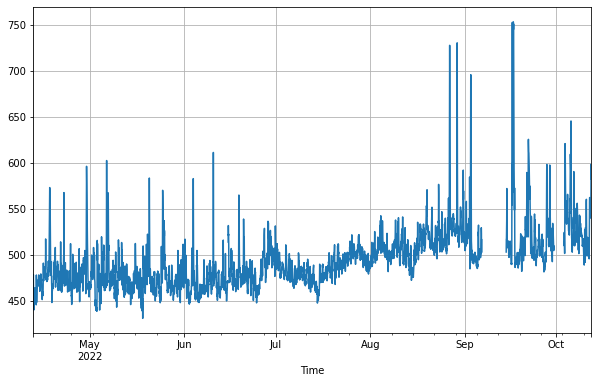

In [ ]:
df['CO2'].plot(figsize=(10,6)).autoscale(axis='x',tight=True);
plt.grid(True)
plt.savefig('co2_1.png')


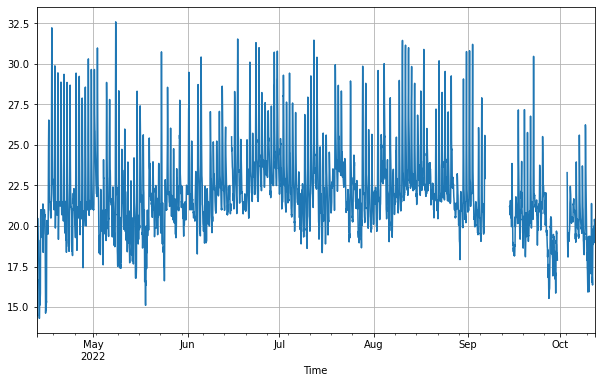

In [ ]:
df['TEMP'].plot(figsize=(10,6)).autoscale(axis='x',tight=True);
plt.grid(True)
plt.savefig('temp_1.png')

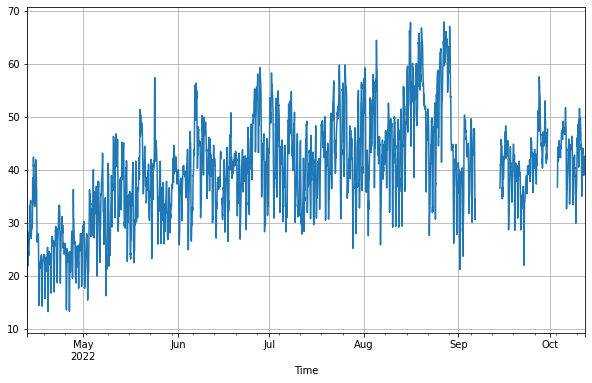

In [ ]:
df['HUM'].plot(figsize=(10,6)).autoscale(axis='x',tight=True);
plt.grid(True)
plt.savefig('hum_1.png')

### Daily

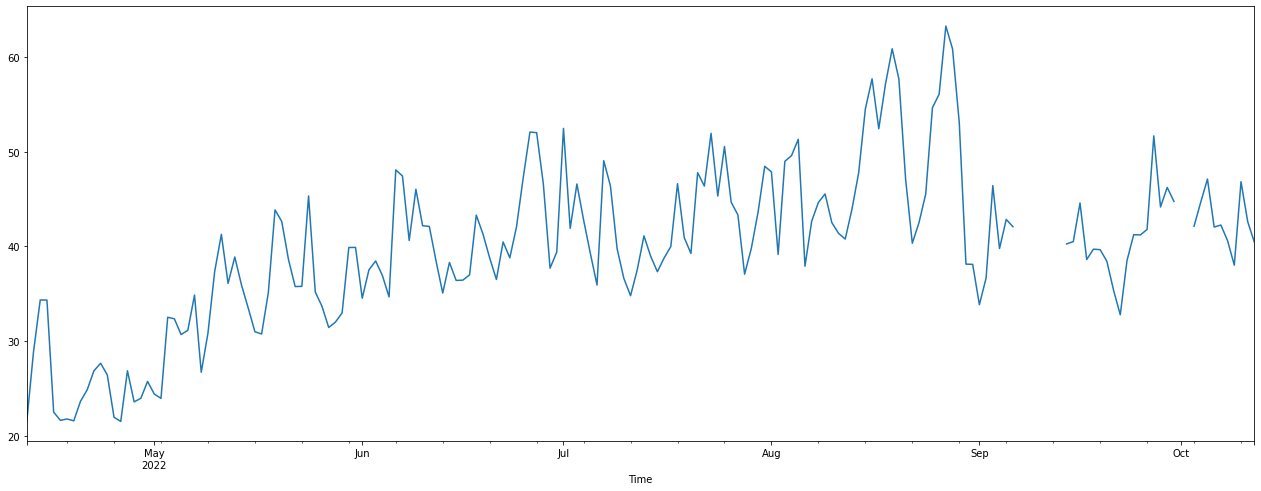

In [ ]:
df_daily['HUM'].plot(figsize=(22,8)).autoscale(axis='x',tight=True);

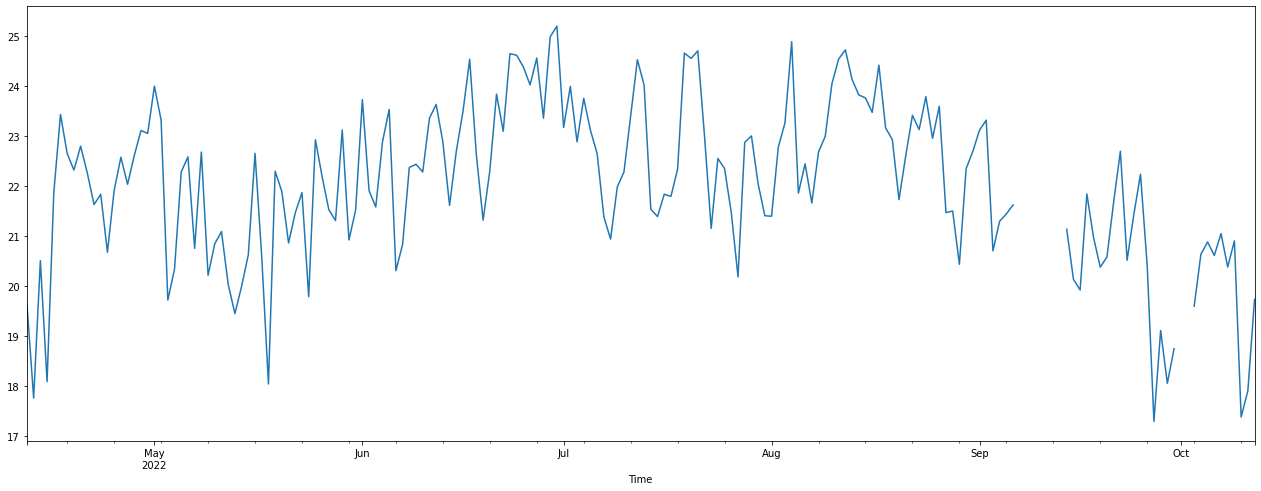

In [ ]:
df_daily['TEMP'].plot(figsize=(22,8)).autoscale(axis='x',tight=True);

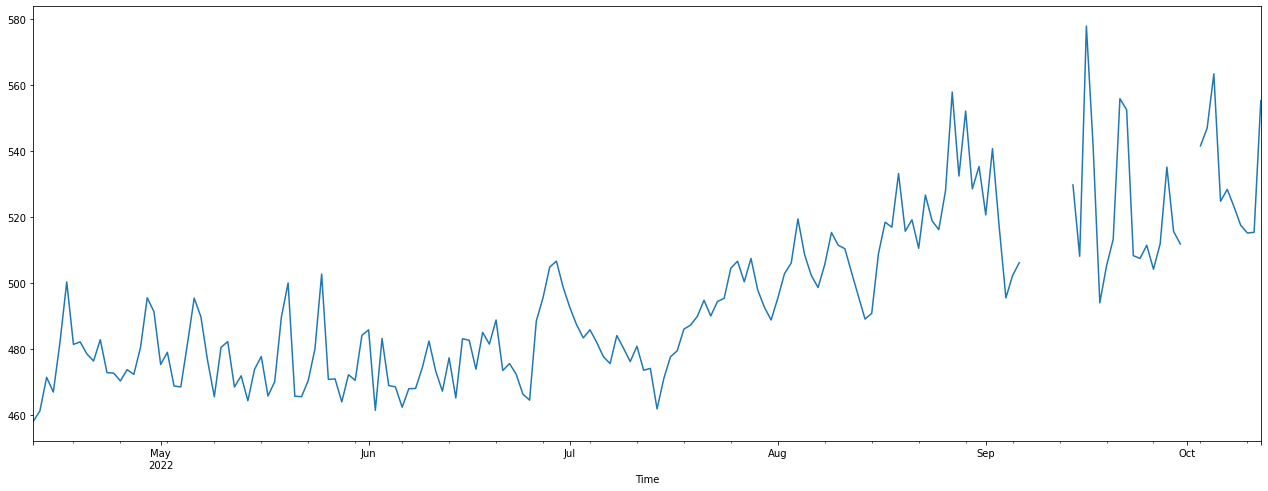

In [ ]:
df_daily['CO2'].plot(figsize=(22,8)).autoscale(axis='x',tight=True);

## **Missing data** : Missing data is a well-known problem in Data Science. Missing data can cause problems in data analysis and modeling. Therefore rows with missing values need to be deleted or the missing values should be filled with reasonable values. [More information here](https://jagan-singhh.medium.com/missing-data-in-time-series-5dcf19b0f40f)

### Linear interpolation: This technique originates from Numerical Analysis, which estimates unknown values by assuming linear relation within a range of data points, unlike linear extrapolation, which estimates data outside the range of the provided data points

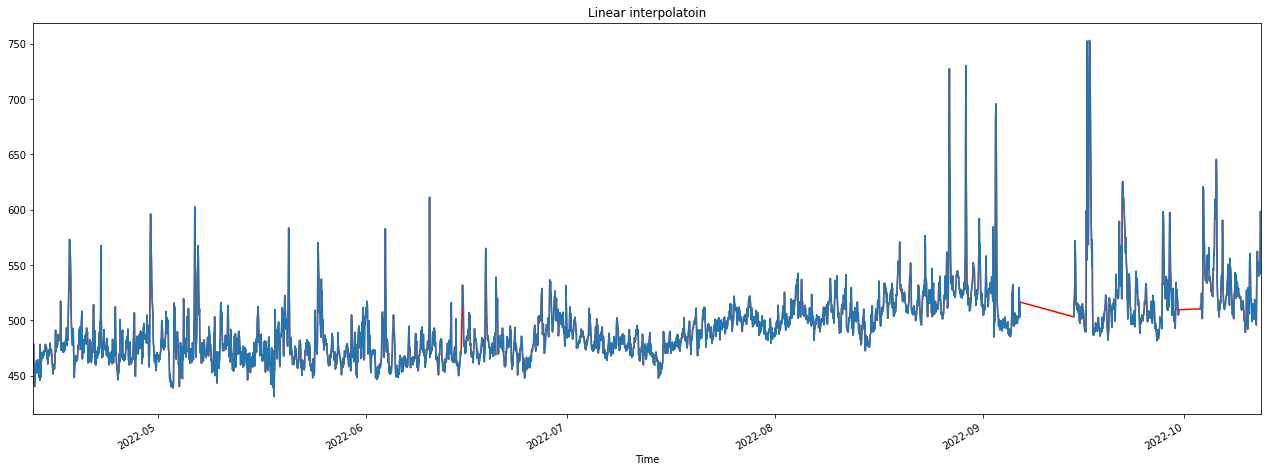

<Figure size 1584x432 with 0 Axes>

In [ ]:
aux= df['CO2'].interpolate(method='linear')
# plot the complete dataset
plt.plot(aux, color='red')
df['CO2'].plot(figsize=(22,8)).autoscale(axis='x',tight=True);
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.figure(figsize=(22,6)) 
plt.show()

### Interpolation with Padding
We can specify the limit of NaN values to be filled. we have a maximum of 2 NaN values in the dataframe so our limit will be 200.

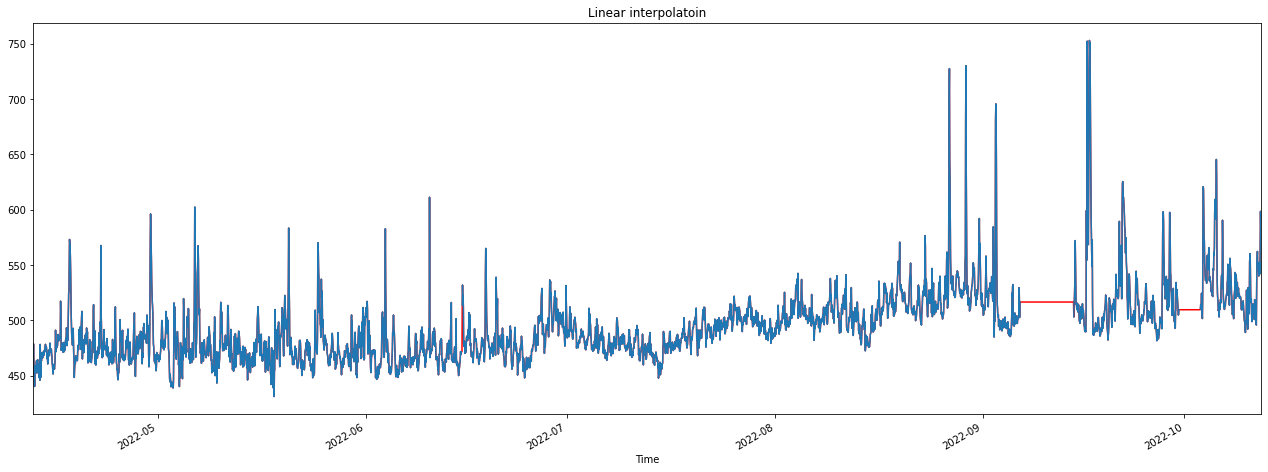

<Figure size 1584x432 with 0 Axes>

In [ ]:
aux= df['CO2'].interpolate(method="pad", limit=200)
# plot the complete dataset
plt.plot(aux, color='red')
df['CO2'].plot(xlim=['2022-06-01','2022-07-01'],figsize=(22,8)).autoscale(axis='x',tight=True);
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.figure(figsize=(22,6)) 
plt.show()

### Next Observation Carried Backward (NOCB)
According to this technique, the missing values are imputed using an immediate value ahead of them. We can implement this method as follows:

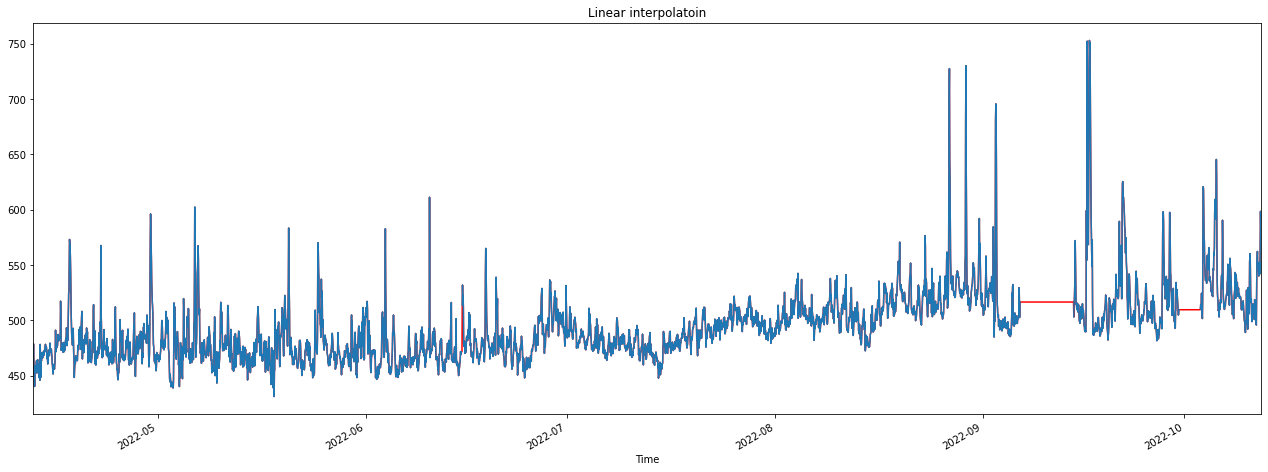

<Figure size 1584x432 with 0 Axes>

In [ ]:
aux= df['CO2'].fillna(method='ffill')
# plot the complete dataset
plt.plot(aux, color='red')
#plt.plot(df['CO2'].iloc[:], color='blue')
df['CO2'].plot(figsize=(22,8)).autoscale(axis='x',tight=True);
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.figure(figsize=(22,6)) 
plt.show()

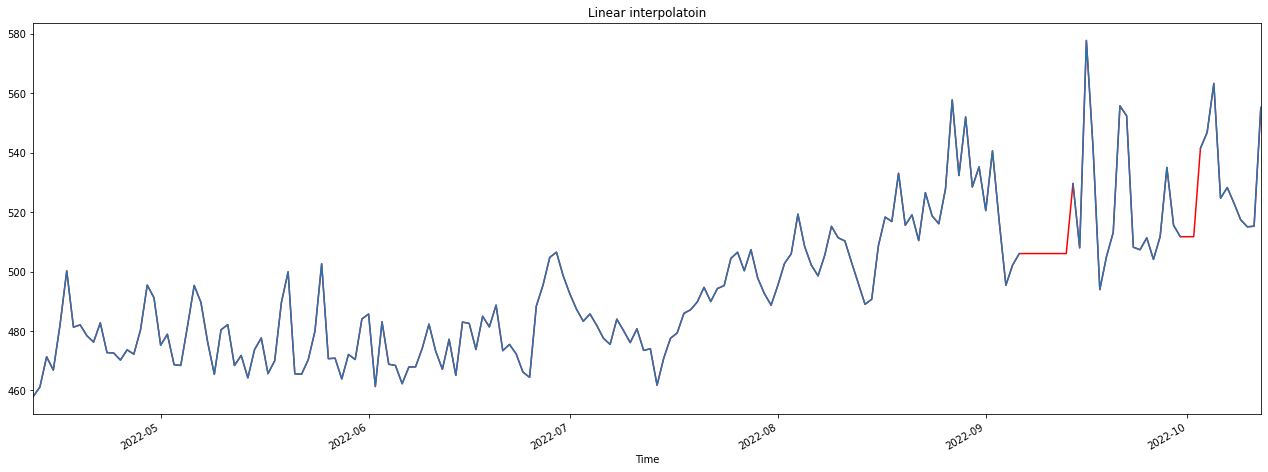

<Figure size 1584x432 with 0 Axes>

In [ ]:
#Hourly
aux= df_daily['CO2'].fillna(method='ffill')
# plot the complete dataset
plt.plot(aux, color='red')
#plt.plot(df['CO2'].iloc[:], color='blue')
df_daily['CO2'].plot(figsize=(22,8)).autoscale(axis='x',tight=True);
# add the tittle of our plot as Linear interpolation
plt.title('Linear interpolatoin')
# print the plot
plt.figure(figsize=(22,6)) 
plt.show()

### Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window

### Hourly

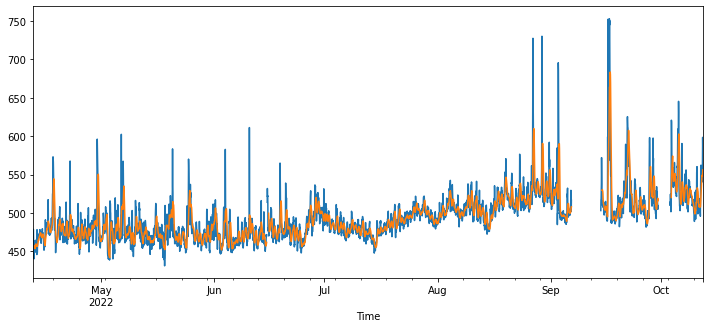

In [ ]:
df['CO2'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=10).mean()['CO2'].plot();

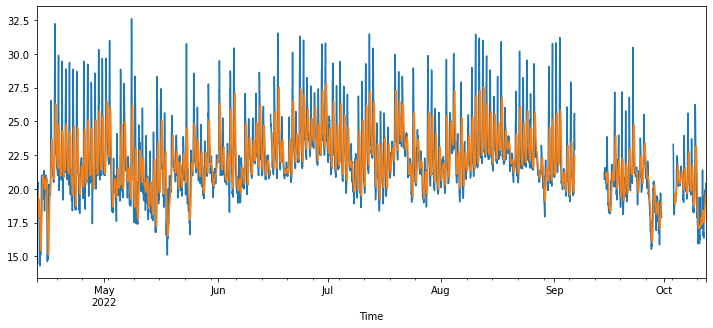

In [ ]:
df['TEMP'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=10).mean()['TEMP'].plot();

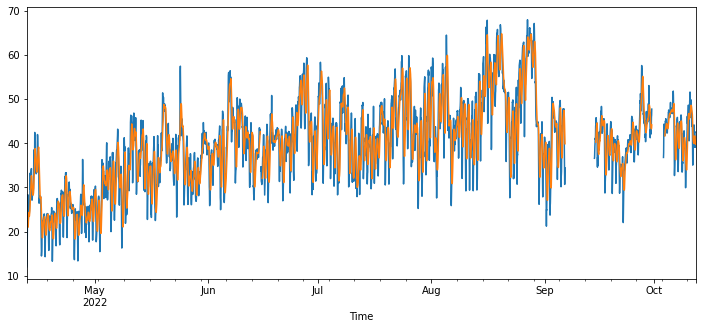

In [ ]:
df['HUM'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=10).mean()['HUM'].plot();

### Daily

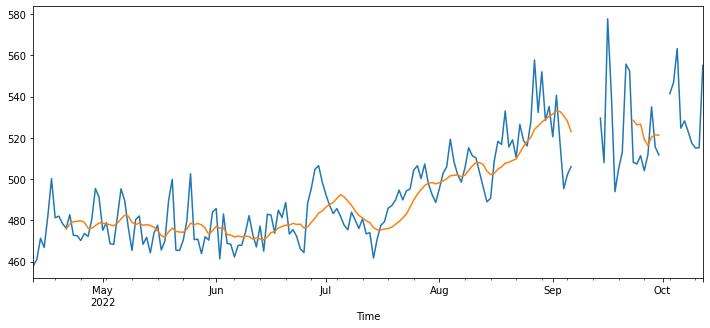

In [ ]:
df_daily['CO2'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df_daily.rolling(window=10).mean()['CO2'].plot();

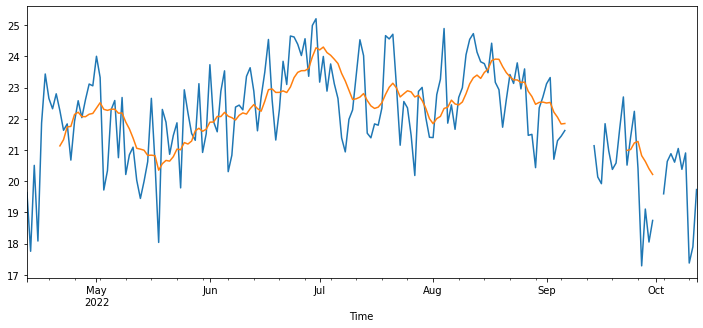

In [ ]:
df_daily['TEMP'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df_daily.rolling(window=10).mean()['TEMP'].plot();

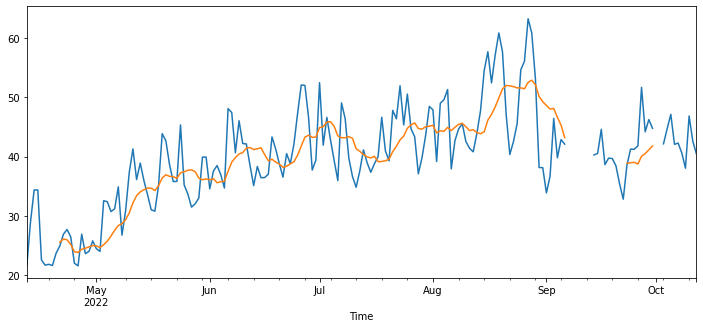

In [ ]:
df_daily['HUM'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df_daily.rolling(window=10).mean()['HUM'].plot();

## **ETS**

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

<div class="alert alert-info"><h3>Related Function:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html'>statsmodels.tsa.seasonal.seasonal_decompose</a></strong><font color=black>(x, model)</font>&nbsp;&nbsp;
Seasonal decomposition using moving averages</tt>
<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/ets.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Innovations state space models for exponential smoothing</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Decomposition of time series</font></div>

## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

### Daily

In [ ]:
df_pruned_daily=pd.DataFrame(({'CO2':df['CO2'].iloc[:3300],
                        'TEMP':df['TEMP'].iloc[:3300],
                         'HUM':df['HUM'].iloc[:3300]}))
df_pruned_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3300 entries, 2022-04-12 11:00:00 to 2022-08-27 22:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     3297 non-null   float64
 1   TEMP    3297 non-null   float64
 2   HUM     3297 non-null   float64
dtypes: float64(3)
memory usage: 232.2 KB


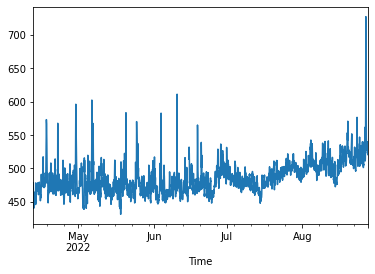

In [ ]:
df_pruned_daily['CO2'].plot()


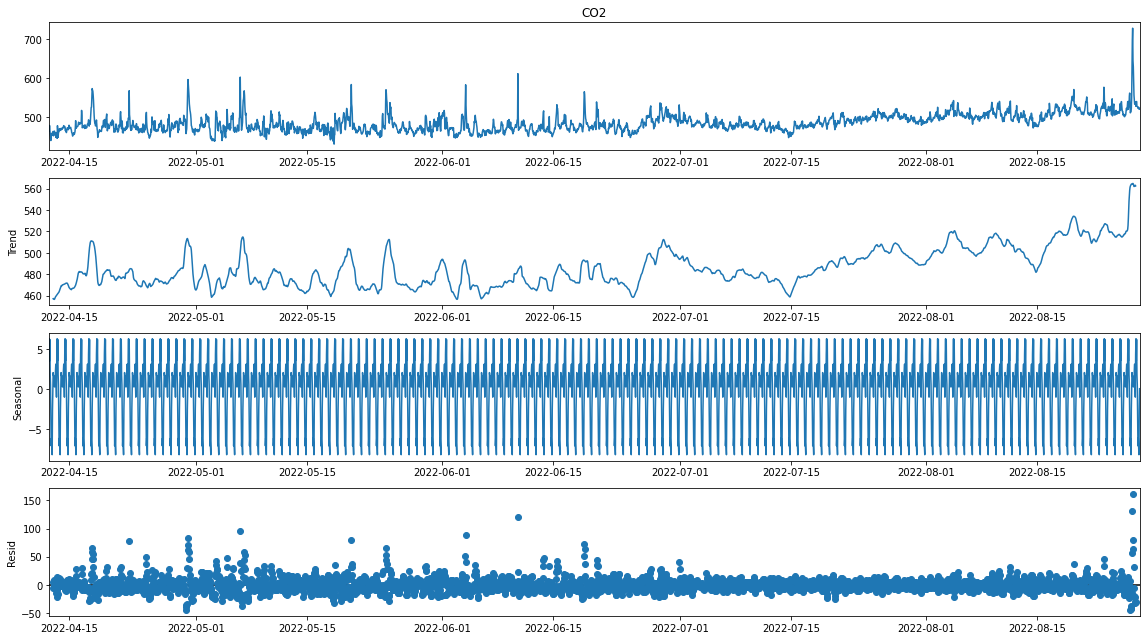

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_pruned_daily['CO2']=df_pruned_daily['CO2'].interpolate(method='linear')
result = seasonal_decompose(df_pruned_daily['CO2'], model='additive')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()
fig.savefig('co2_sd.png')


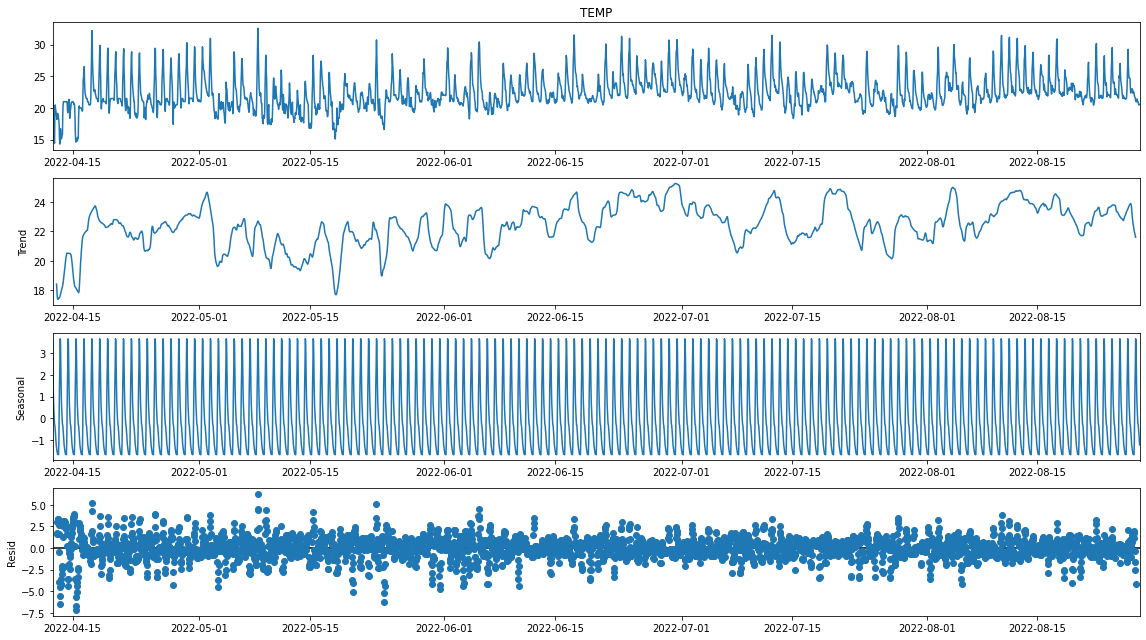

In [ ]:
df_pruned_daily['TEMP']=df_pruned_daily['TEMP'].interpolate(method='linear')
result = seasonal_decompose(df_pruned_daily['TEMP'], model='additive')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()
fig.savefig('temp_sd.png')

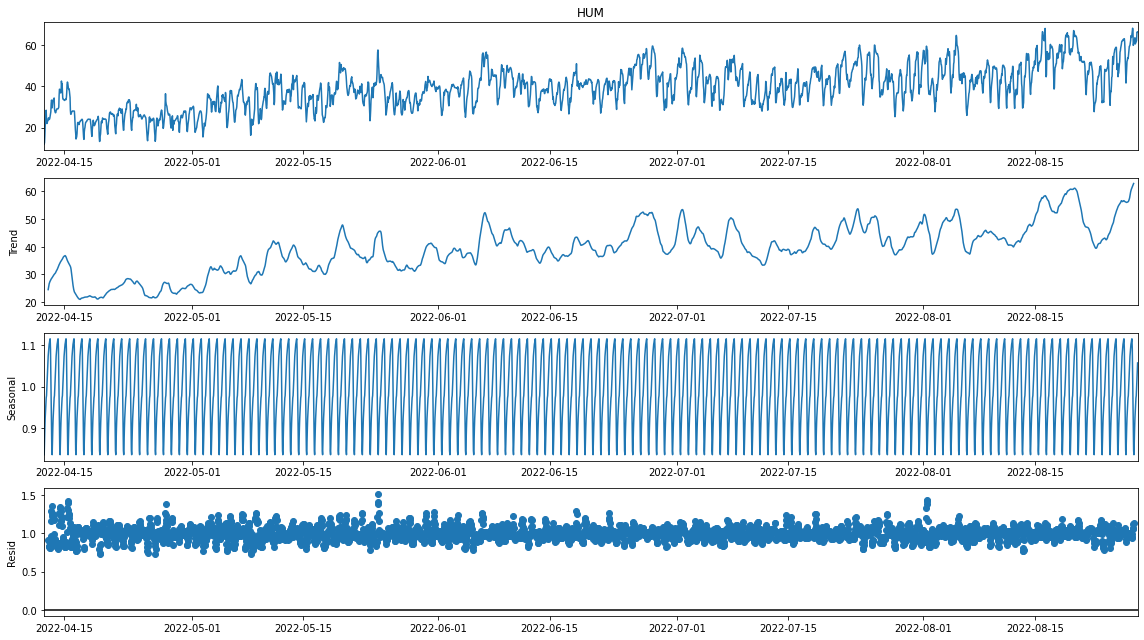

In [ ]:
df_pruned_daily['HUM']=df_pruned_daily['HUM'].interpolate(method='linear')
result = seasonal_decompose(df_pruned_daily['HUM'], model='mul')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()
fig.savefig('hum_sd.png')

In [ ]:
df_pruned_daily.to_csv(r'sensor_data_daily.csv')

### Hourly

In [ ]:
df_pruned_hourly=pd.DataFrame(({'CO2':df['CO2'].iloc[0:3349],
                        'TEMP':df['TEMP'].iloc[0:3349],
                         'HUM':df['HUM'].iloc[0:3349]}))
df_pruned_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3349 entries, 2022-04-12 11:00:00 to 2022-08-29 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     3346 non-null   float64
 1   TEMP    3346 non-null   float64
 2   HUM     3346 non-null   float64
dtypes: float64(3)
memory usage: 233.7 KB


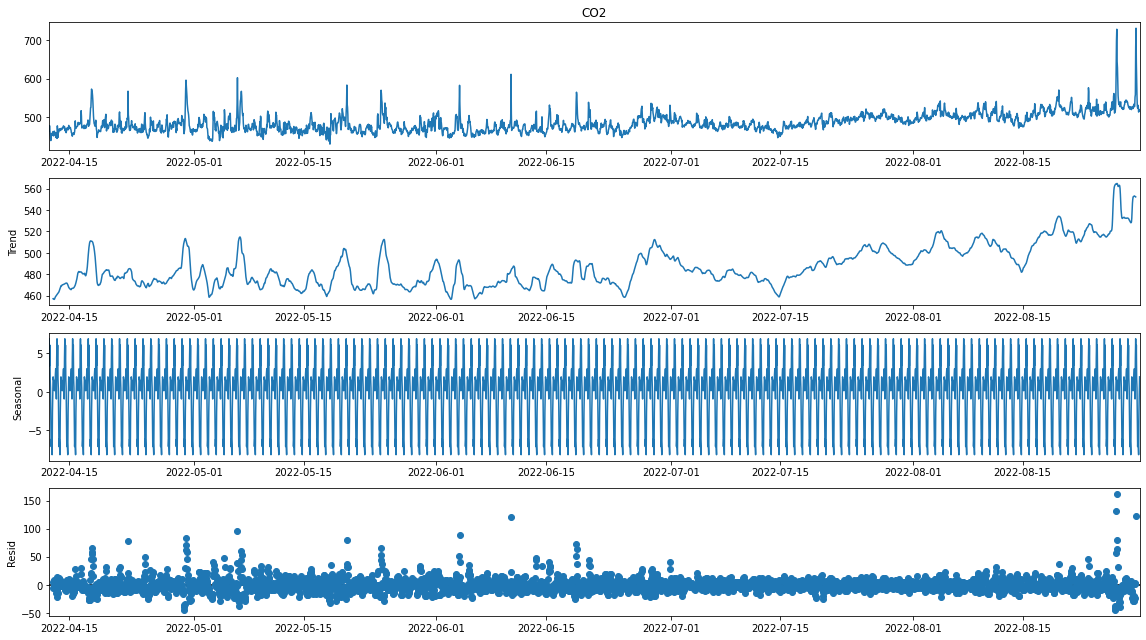

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_pruned_hourly['CO2']=df_pruned_hourly['CO2'].interpolate(method='linear')
result = seasonal_decompose(df_pruned_hourly['CO2'], model='additive')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

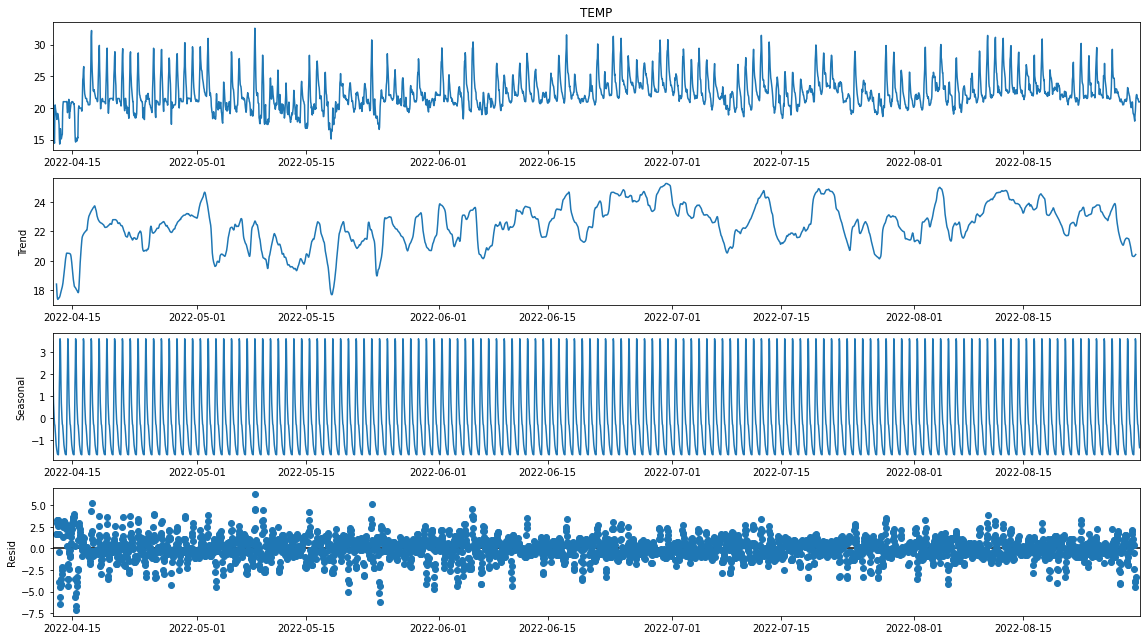

In [ ]:
df_pruned_hourly['TEMP']=df_pruned_hourly['TEMP'].interpolate(method='linear')
result = seasonal_decompose(df_pruned_hourly['TEMP'], model='additive')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

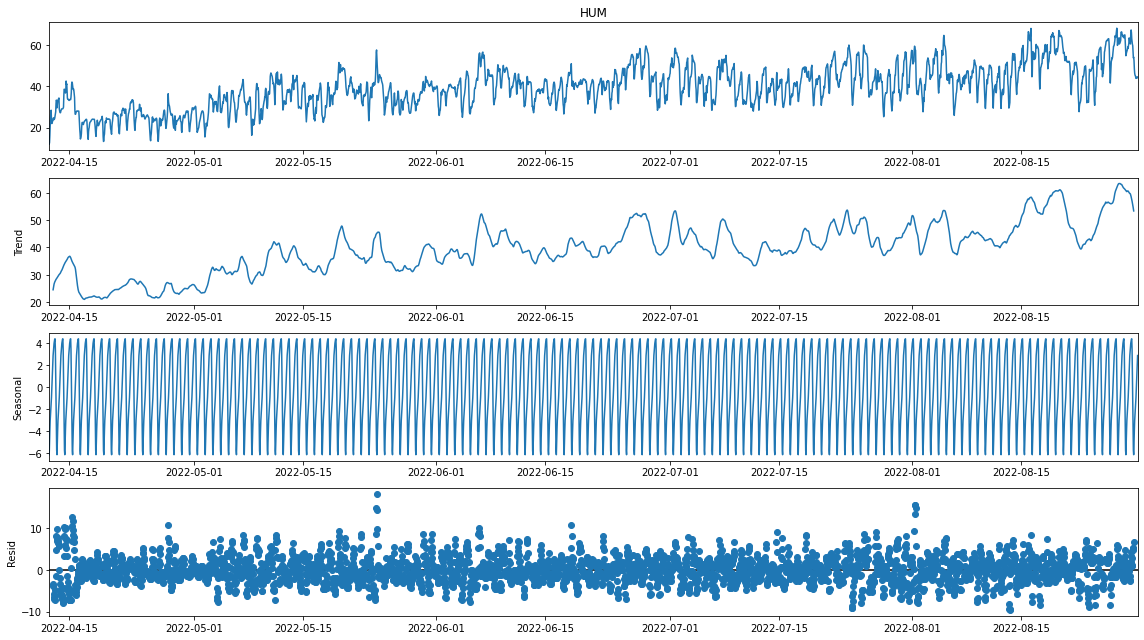

In [ ]:
df_pruned_hourly['HUM']=df_pruned_hourly['HUM'].interpolate(method='linear')
result = seasonal_decompose(df_pruned_hourly['HUM'], model='additive')  # model='mul' also works
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
df_pruned_hourly.to_csv(r'sensor_data_hourly.csv')